![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Interpolación - Segunda Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Interpolación de Newton
___

Esta forma de armar el polinomio se denomina Método de las Diferencias Divididas de
Newton, y podemos sistematizarla para que sea muy sencillo de aplicar. Analicemos un ejemplo para obtener un polinomio interpolante a partir de los puntos $x_0$, $x_1$, $x_2$, y $x_3$. En la siguiente tabla se puede ver como generar las diferencias divididas:

|   $x$  | $f(x)$  | $f(x_i, x_{i+1})$   | $f(x_i, x_{i+1}, x_{i+2})$ | $f(x_i, x_{i+1}, x_{i+2}, x_{i+3})$ |
|:----:|--------|--------------------|---------------------------|------------------------------------|
| $x_0$  | $f(x_0)=y_0$ | $f(x_0, x_1)=\frac{y_1-y_0}{x_1-x_0}$       | $f(x_0, x_1, x_2)=\frac{f(x_1 ,x_2)-f(x_0, x_1)}{x_2-x_0}$          | $f(x_0, x_1, x_2, x_3)=\frac{f(x_1, x_2, x_3)-f(x_0, x_1, x_2)}{x_3-x_0}$              |
| $x_1$  | $f(x_1)=y_1$ | $f(x_1 ,x_2)=\frac{y_2-y_1}{x_2-x_1}$       | $f(x_1, x_2, x_3)=\frac{f(x_2, x_3)-f(x_1 ,x_2)}{x_3-x_1}$          |                                    |
| $x_2$  | $f(x_2)=y_2$ | $f(x_2, x_3)=\frac{y_3-y_2}{x_3-x_2}$        |                           |                                    |
| $x_3$  | $f(x_3)=y_3$ |                    |                           |                                    |




Vamos a hacer un pequeño cambio de nomenclatura para que resulte más sencillo de escribir:

|   $x$  | $y$  | $F_{i,i+1}$   | $F_{i,i+1,i+2}$ | $F_{i,i+1,i+2,i+3}$ |
|:----:|--------|--------------------|---------------------------|------------------------------------|
| $x_0$  | $y_0$ | $F_{0,1}=\frac{y_1-y_0}{x_1-x_0}$        |$F_{0,1,2}=\frac{F_{1,2}-F_{0,1}}{x_2-x_0}$          | $F_{0,1,2,3}=\frac{F_{1,2,3}-F_{0,1,2}}{x_3-x_0}$              |
| $x_1$  | $y_1$ | $F_{1,2}=\frac{y_2-y_1}{x_2-x_1}$        |$F_{1,2,3}=\frac{F_{2,3}-F_{1,2}}{x_3-x_1}$          |                                    |
| $x_2$  | $y_2$ | $F_{2,3}=\frac{y_3-y_2}{x_3-x_2}$        |                           |                                    |
| $x_3$  | $y_3$ |


Observemos que podemos armar dos polinomios con todos los puntos aplicando la Interpolación o Método de Newton. 
Si lo planteamos partiendo de $x_0$ obtenemos el polinomio de forma **Progresiva**:

$$P(x)=y_0 + F_{0,1}(x - x_0) + F_{0,1,2}(x - x_0)(x - x_1)+ F_{0,1,2,3}(x - x_0)(x - x_1)(x - x_2)$$


Si partimos de $x_3$ obtenemos el polinomio de manera **Regresiva** : 

$$ P(x) = y_3 + F_{2,3}(x - x_3) + F_{1,2,3}(x - x_3)(x - x_2)+ F_{0,1,2,3}(x - x_3)(x - x_2)(x - x_1)$$

In [9]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib.pyplot as plt #librería para graficar

def NewtonProgresivo(df,x):
        n = len(df)
        A = np.zeros([n,n+1])
        for f in range(0,n):
            A[f,0] = df['x'][f]
            A[f,1] = df['y'][f]   
            contador=1
            for j in range(2,n+1):
                for i in range(0,n-contador):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador,0]-A[i,0])
                contador+=1
        suma=0
        prod =1
        for k in range (0,n):
            suma+=A[0,k+1]*prod
            prod*=x-A[k,0]
            
        return print('Por el método de Newton Progresivo obtenemos P(x=',x,')=',round(suma,5)), A, suma  


### Resolvamos un ejemplo numérico
___

Supongamos que tenemos la siguiente tabla y queremos calcular $P(4.5)=?$

|$i$| $x$ | $y$
| ---| --- | ---
|$0$ |2 | 7
|$1$| 4 | 6
|$2$| 5  | 9
|$3$|7| 12

In [123]:
#Cargo los datos

data = [[2, 7], [4, 6], [5, 9], [7, 12]]
df = pd.DataFrame(data, columns = ['x', 'y'])

xp=4.5

#Resuelvo y muestro los coeficientes en una tabla

ejemplo=NewtonProgresivo(df,xp)
DiferenciasDividasProg=pd.DataFrame(ejemplo[1])
DiferenciasDividasProg

Por el método de Newton Progresivo obtenemos P(x= 4.5 )= 7.41667


C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


,0,1,2,3,4
0,2.0,7.0,-0.5,1.166667,-0.333333
1,4.0,6.0,3.0,-0.500000,0.000000
2,5.0,9.0,1.5,0.000000,0.000000
3,7.0,12.0,0.0,0.000000,0.000000


In [205]:
## from IPython.display import display, Math

N=len(df)
x = df['x']
y = df['y']
PNP=np.round(ejemplo[2],4)
F=np.round(DiferenciasDividasProg,4)

print ("Analicemos el ejemplo con 4 datos: \n") 
print ("Calculamos las diferencias divididas L: \n") 

n=N-1
for j in range(0,n):
      dif = str(j) + str(j+1) 
      diff="F"+dif
      difx = "=\\frac{y_"+ str(j+1) + "- y_"+str(j)+"}{x_"+ str(j+1) + "-x_"+str(j)+"}"
      difxnum = "=\\frac{"+ str(y[j+1]) + "- "+str(y[j])+"}{"+ str(x[j+1]) + "-"+str(x[j])+"}="
      display(Math((diff+difx+difxnum+str(F[2][j]))))
        
for j in range(0,n-1):
      dif = str(j) + str(j+1)+ str(j+2) 
      diff="F"+dif
      difx = "=\\frac{F" + str(j+1)+ str(j+2) +"- F" + str(j)+ str(j+1)+"}{x_"+ str(j+2) + "-x_"+str(j)+"}="
      difxnum = "=\\frac{"+ str(F[2][j+1]) + "- "+str(F[2][j])+"}{"+ str(x[j+2]) + "-"+str(x[j])+"}="
      display(Math((diff+difx+difxnum+str(F[3][j]))))

for j in range(0,n-2):
      dif = str(j) + str(j+1)+ str(j+2) + str(j+3)
      diff="F"+dif
      difx = "=\\frac{F" + str(j+1)+ str(j+2)+str(j+3) +"- F" + str(j)+ str(j+1)+ str(j+2)+"}{x_"+ str(j+3) + "-x_"+str(j)+"}="
      difxnum = "=\\frac{"+ str(F[3][j+1]) + "- "+str(F[3][j])+"}{"+ str(x[j+3]) + "-"+str(x[j])+"}="
      display(Math((diff+difx+difxnum+str(F[4][j]))))
        
print ("Luego armamos el polinomio de Newton Progresivo : \n") 
pol="P_"+str(n)+"(x)=y_0 + F01(x - x_0) + F012(x - x_0)(x - x_1)+ F0123(x - x_0)(x - x_1)(x - x_2)"
display(Math((pol)))

print ("Reemplazando por los valores : \n") 
polnu="P_"+str(n)+"(x="+str(xp)+")="+str(F[1][0])+" + "+str(F[2][0])+"("+str(xp)+" - "+str(F[0][0])+") + "+str(F[3][0])+"("+str(xp)+" - "+str(F[0][0])+")("+str(xp)+" - "+str(F[0][1])+")+ "+str(F[4][0])+"("+str(xp)+" - "+str(F[0][0])+")("+str(xp)+" -"+str(F[0][1])+")("+str(xp)+" - "+str(F[0][2])+")="
display(Math((polnu+str(PNP))))

Analicemos el ejemplo con 4 datos: 

Calculamos las diferencias divididas L: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego armamos el polinomio de Newton Progresivo : 



<IPython.core.display.Math object>

Reemplazando por los valores : 



<IPython.core.display.Math object>

In [7]:
def NewtonProgresivoPlot(df,x):
        n = len(df)
        A = np.zeros([n,n+1])
        for f in range(0,n):
            A[f,0] = df['x'][f]
            A[f,1] = df['y'][f]   
            contador=1
            for j in range(2,n+1):
                for i in range(0,n-contador):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador,0]-A[i,0])
                contador+=1
        suma=0
        prod =1
        for k in range (0,n):
            suma+=A[0,k+1]*prod
            prod*=x-A[k,0]
            
        return suma  

C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


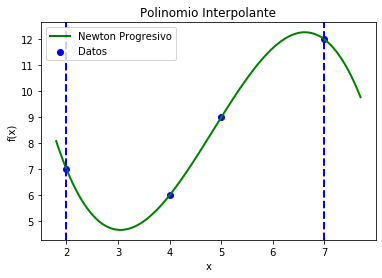

In [207]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

ejex = np.linspace(min(df['x'])*0.9, max(df['x'])*1.1,num=1000)
Nx=len(ejex)
y_np=np.zeros(Nx)


for i in range(0,Nx):
    y_np[i] = NewtonProgresivoPlot(df,ejex[i]);
    
plt.plot(ejex, y_np, linewidth=2, color = 'green')
plt.scatter(df['x'], df['y'], color = 'blue')
plt.legend(['Newton Progresivo','Datos','limite','dato'],fontsize=10)
plt.axvline(min(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Polinomio Interpolante');

### ¿Qué pasa si quiero agregar un punto?

Supongamos que tenemos la siguiente tabla y queremos calcular $P(4.5)=?$

|$i$| $x$ | $y$
| ---| --- | ---
|$0$ |2 | 7
|$1$| 4 | 6
|$2$| 5  | 9
|$3$|7| 12
|$4$|8| 10

Con $n+1$ puntos tengo un polinomio de grado $n$, por ende con 5 puntos tengo un polinomio de grado 4.
¿Puedo utilizar los cálculos que ya hice?

Recordamos el Polinimio Progresivo de grado 3 :
$$P_3(x)=y_0 + F_{0,1}(x - x_0) + F_{0,1,2}(x - x_0)(x - x_1)+ F_{0,1,2,3}(x - x_0)(x - x_1)(x - x_2)$$

Escribiendo el Polinimio Progresivo de grado 4 :
$$P_4(x)=y_0 + F_{0,1}(x - x_0) + F_{0,1,2}(x - x_0)(x - x_1)+ F_{0,1,2,3}(x - x_0)(x - x_1)(x - x_2)+ F_{0,1,2,3,4}(x - x_0)(x - x_1)(x - x_2)(x - x_3)$$ 

Por lo tanto podemos observar que:
$$ P_4(x)=P_3(x)+F_{0,1,2,3,4}(x - x_0)(x - x_1)(x - x_2)(x - x_3)$$ 


### Propuesta de ejercicio

Resolver agregando ese nuevo punto.
- ¿Cuántos cálculos nuevos debo hacer?
- ¿Qué pasa si el punto que agrego está al principio?
- ¿Qué pasa si el punto que agrego está en el medio de la grilla?

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Gracias por su atención
***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*